In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
confirmed_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
recovered_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
deaths_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

In [3]:
confirmed = confirmed_data.loc[confirmed_data["Country/Region"] == "US"]
confirmed = confirmed.drop(["Province/State","Country/Region","Lat","Long","3/13/20"],axis=1)
confirmed.head()

recovered = recovered_data.loc[recovered_data["Country/Region"] == "US"]
recovered = recovered.drop(["Province/State","Country/Region","Lat","Long","3/13/20"], axis=1)
recovered.head()

deaths = deaths_data.loc[deaths_data["Country/Region"] == "US"]
deaths = deaths.drop(["Province/State","Country/Region","Lat","Long","3/13/20"], axis=1)
deaths.head()
#michigan = test.loc[test["Province/State"] == "Michigan"]
#dates = np.array([])
#confirmed_m = np.array([])
#for col in michigan.columns[4:-1]:
#    dates = np.append(dates,col)
#    confirmed_m = np.append(confirmed_m,michigan[col])
#plt.plot(dates,confirmed_m)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23,29,31
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,3,4
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


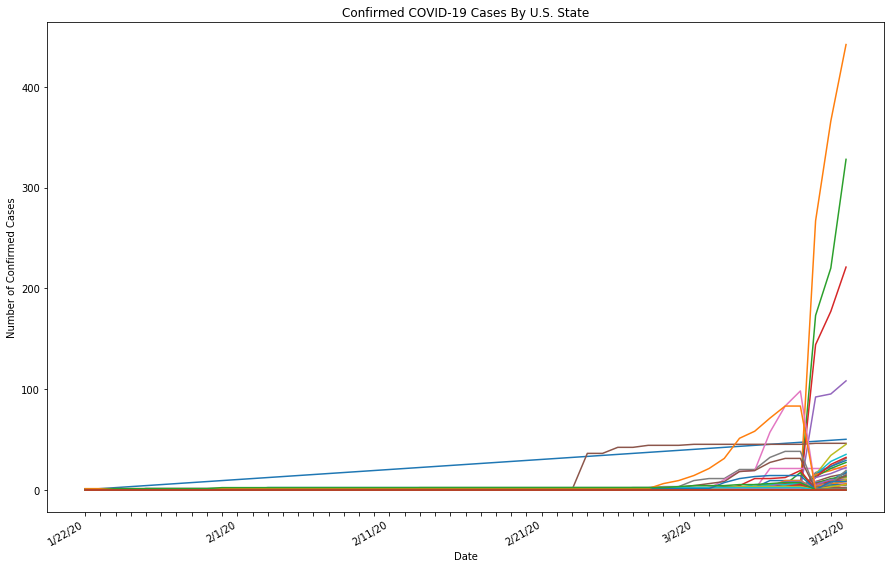

<Figure size 1080x720 with 0 Axes>

In [7]:
import matplotlib.dates as mdates

dates = np.array([])
for col in confirmed.columns:
    dates = np.append(dates,col)

confirmed_matrix = np.empty([1,51])
total_confirmed_matrix = np.empty([1,51])
for index, row in confirmed.iterrows():
    state_confirmed = np.array([])
    for val in confirmed.loc[index]:
        state_confirmed = np.append(state_confirmed,val)
    confirmed_matrix = np.vstack([confirmed_matrix,state_confirmed])

fig, ax = plt.subplots(figsize=(15,10))
plt.locator_params(axis='x', nbins=6)
plt.figure(figsize=(15,10))
for row in confirmed_matrix:
    total_confirmed_matrix += row
    ax.plot(dates,row)
    
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title("Confirmed COVID-19 Cases By U.S. State")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Confirmed Cases")
fig.savefig("confirmed_state.png")

In [ ]:
print(total_confirmed_matrix[0])

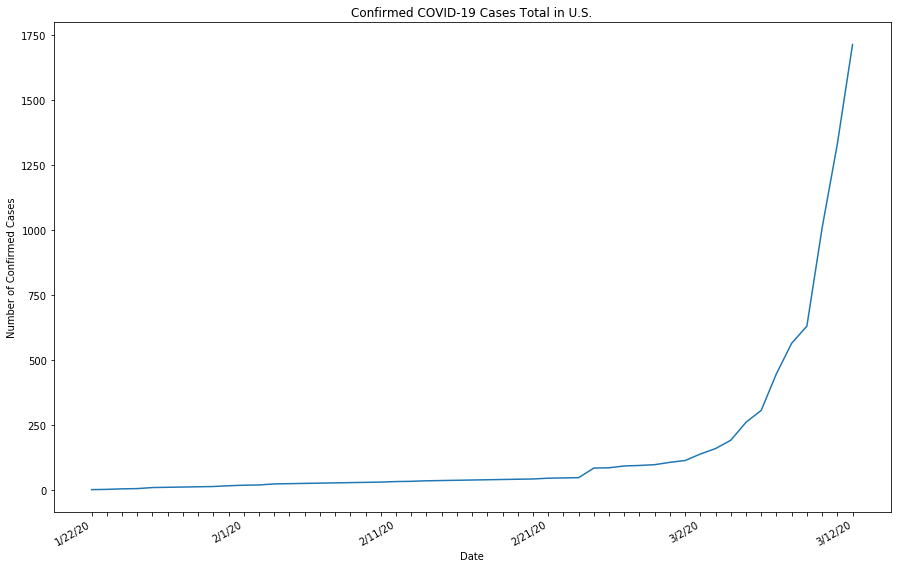

<Figure size 1080x720 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
plt.locator_params(axis='x', nbins=6)
plt.figure(figsize=(15,10))
ax.plot(dates,total_confirmed_matrix[0])
    
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title("Confirmed COVID-19 Cases Total in U.S.")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Confirmed Cases")
fig.savefig("confirmed_total.png")